<a href="https://colab.research.google.com/github/jcjcchang/2nd-ML100Days/blob/master/homework/Day_003_2_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

In [0]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [0]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

In [0]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = "\n"


data = data.split(split_tag)
print(len(data))
data[0:100]

## 將 txt 轉成 pandas dataframe

In [0]:
import pandas as pd


arrange_data = []
for line in data:
  line = line.replace('\t',',').split(',')# 將每句最後的 /t 取代成逗號後，再以逗號斷句
  arrange_data.append(line)
    
arrange_data

In [0]:
df = pd.DataFrame(arrange_data)
#不知道為什麼會多出的欄位...??
df.drop(columns = [2,3,4],inplace = True)
df.columns = [['id','image_url']]

print(df.head(5))
print(df['image_url'].loc[0])
#print(df[0:5][1].values)

## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

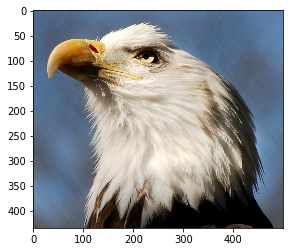

In [101]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df['image_url'].loc[0]


first_link
#不知道爲什麼 link 會突然被省略掉了 !? 
#response = requests.get(first_link)
response = requests.get('https://farm1.static.flickr.com/145/430300483_21e993670c.jpg')
img = Image.open(BytesIO(response.content))

# Convert img to numpy array
img = np.array(img)
plt.imshow(img)
plt.show()

In [0]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    
    return img_list

In [0]:
result = img2arr_fromURLs(df[0:5][1].values)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()